In [6]:

from numpy import loadtxt
from matplotlib.pyplot import subplots, show

# Load data
filename = 'partA/ir1-calibration.csv'
data = loadtxt(filename, delimiter=',', skiprows=1)



In [7]:
import scipy as sp 

def sonar1_model(x, a, b):
    return a*x + b

sonar1_params, cov = sp.optimize.curve_fit(sonar1_model, distance, sonar1)
sonar1_fit = sonar1_model(distance, *sonar1_params)

fig, ax = subplots(1)
ax.plot(distance, sonar1, '.', alpha=0.2)
ax.plot(distance, sonar1_fit)


NameError: name 'distance' is not defined

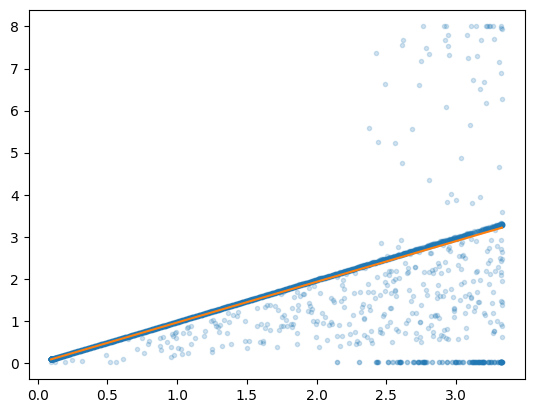

In [147]:
import numpy as np
sonar1_initial_residuals = sonar1 - sonar1_fit
sonar1_mask = abs(sonar1_initial_residuals) < np.std(sonar1_initial_residuals) * 0.7
sonar1_no_outliers = sonar1[sonar1_mask]
distance_sonar1_no_outliers = distance[sonar1_mask]

""" fig, ax = subplots(2)
ax[0].plot(distance_sonar1_no_outliers, sonar1_no_outliers, '.', alpha=0.2)
ax[1].plot(distance, sonar1, '.', alpha=0.2) """

sonar1_params, cov = sp.optimize.curve_fit(sonar1_model, distance_sonar1_no_outliers, sonar1_no_outliers)
sonar1_fit = sonar1_model(distance_sonar1_no_outliers, *sonar1_params)

fig, ax = subplots(1)
ax.plot(distance, sonar1, '.', alpha=0.2)
ax.plot(distance_sonar1_no_outliers, sonar1_fit)

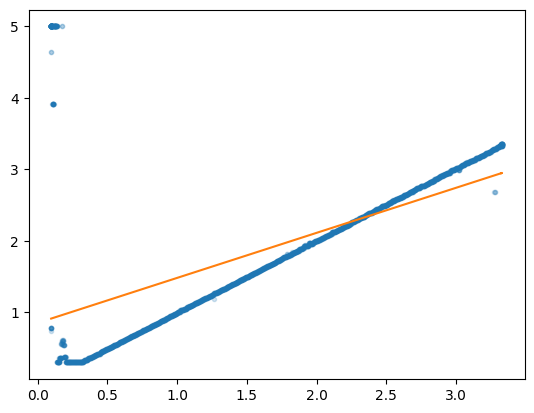

In [148]:
def sonar2_model(x, a, b):
    return a*x + b

sonar2_params, cov = sp.optimize.curve_fit(sonar2_model, distance, sonar2)
sonar2_fit = sonar1_model(distance, *sonar2_params)

fig, ax = subplots(1)
ax.plot(distance, sonar2, '.', alpha=0.2)
ax.plot(distance, sonar2_fit)

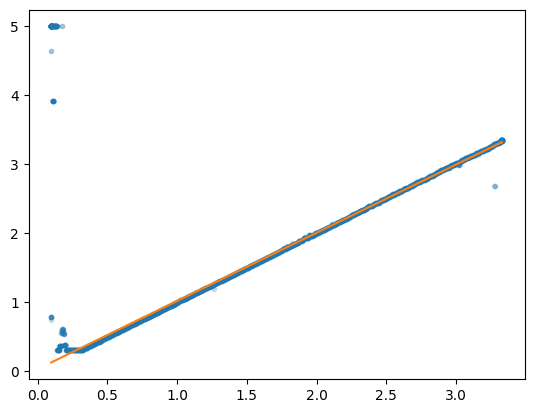

In [149]:
sonar2_initial_residuals = sonar2 - sonar2_fit
sonar2_mask = abs(sonar2_initial_residuals) < np.std(sonar2_initial_residuals) * 3
sonar2_no_outliers = sonar2[sonar2_mask]
distance_sonar2_no_outliers = distance[sonar2_mask]

""" fig, ax = subplots(2)
ax[0].plot(distance_sonar2_no_outliers, sonar2_no_outliers, '.', alpha=0.2)
ax[1].plot(distance, sonar2, '.', alpha=0.2) """

sonar2_params, cov = sp.optimize.curve_fit(sonar2_model, distance_sonar2_no_outliers, sonar2_no_outliers)
sonar2_fit = sonar1_model(distance_sonar2_no_outliers, *sonar2_params)

fig, ax = subplots(1)
ax.plot(distance, sonar2, '.', alpha=0.2)
ax.plot(distance_sonar2_no_outliers, sonar2_fit)

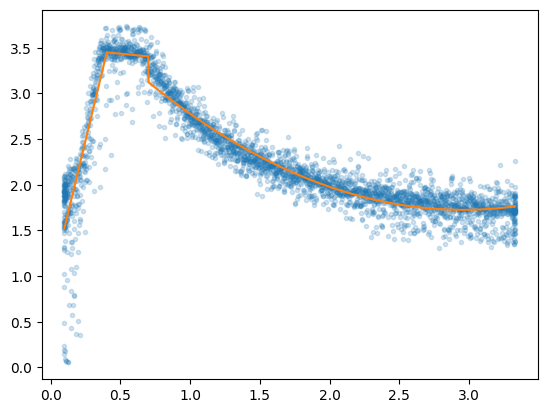

In [150]:
def ir4_model(x, a1, b1, a2, b2, a3, b3, c3):

    res = np.zeros_like(x)
    res[x < 0.4] = a1*x[x < 0.4] + b1
    res[(0.4 <= x) & (x < 0.65)] = a2*x[(0.4 <= x) & (x < 0.65)] + b2
    res[x >= 0.65] = a3*x[x >= 0.65]*x[x >= 0.65] + b3*x[x >= 0.65] + c3
    return res


    #return (a1*x + b1)*(x < 0.4).any() + (a2*x + b2)*(0.4 <= x < 0.7).any() + (a3*x*x + b3*x + c3)*(x >= 0.7).any()
    #return np.piecewise(x, [x < 0.4, 0.4 <= x < 0.7, x >= 0.7], [a1*x + b1, a2*x + b2, a3*x*x + b3*x + c3])


ir4_params, cov = sp.optimize.curve_fit(ir4_model, distance, raw_ir4)
ir4_fit = ir4_model(distance, *ir4_params)

fig, ax = subplots(1)
ax.plot(distance, raw_ir4, '.', alpha=0.2)
ax.plot(distance, ir4_fit)